<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_A_Kinetic_Modelling_of_the_AD_of_Slaughterhouse_Waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# Modified Gompertz-Model


In [ ]:

#Read excel data relating to b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/RC-CGS-M.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Biogas yield of slaughterhouse waste (RC-CGS-M) in ml/g oTS")
print (data)
print (data.columns)

Mounted at /content/drive
Biogas yield of slaughterhouse waste (RC-CGS-M) in ml/g oTS
     HRT(D)  Biogas Yield of RC-CGS-M (ml/g oTS)
0      0.00                                 0.00
1      0.63                                 7.28
2      0.75                                14.35
3      0.88                                19.86
4      1.00                                25.48
..      ...                                  ...
104   65.96                               291.48
105   66.71                               290.96
106   67.88                               291.48
107   69.00                               291.37
108   69.83                               291.58

[109 rows x 2 columns]
Index(['HRT(D)', 'Biogas Yield of RC-CGS-M (ml/g oTS)'], dtype='object')


In [ ]:
# Composite Graph

/tmp/ipython-input-28-262283403.py:6: RuntimeWarning: overflow encountered in exp
  return B0 * (1 - np.exp(-k * t))


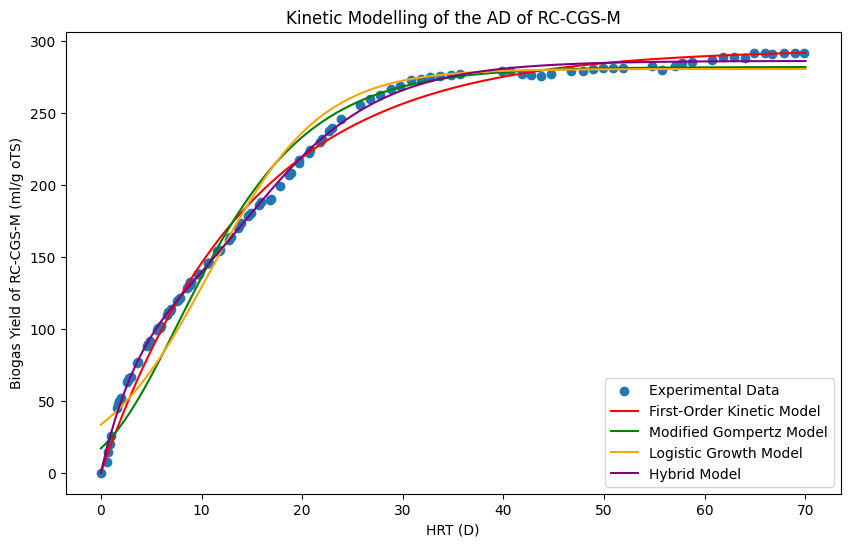

In [ ]:
# Define all model functions
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))

def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = B0 * (1 - np.exp(-k * t))
    gompertz = B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2

def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))

def two_phase_model(t, B1, B2, k1, k2):
    return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))

# Assuming t_data and B_data are already loaded from your data


# Curve fitting for each model
popt_gompertz, pcov_gompertz = curve_fit(gompertz_model, t_data, B_data, bounds=(0.25, [600, 70, 70]))
B0_g, Rm_g, lambda_g = popt_gompertz

popt_first_order, pcov_first_order = curve_fit(first_order_model, t_data, B_data)
B0_fo, k_fo = popt_first_order

# Provide initial guesses and bounds for the hybrid model
initial_guess_hybrid = [300, 0.1, 10, 1]
bounds_hybrid = ([0, 0, 0, 0], [450, 100, 40, 40])
popt_hybrid, pcov_hybrid = curve_fit(hybrid_model, t_data, B_data, p0=initial_guess_hybrid, bounds=bounds_hybrid)
B0_h, k_h, Rm_h, lambda_h = popt_hybrid

popt_logistic, pcov_logistic = curve_fit(logistic_growth_model, t_data, B_data, bounds=(0, [300, 70, 7]))
B0_l, Rm_l, lambda_l = popt_logistic


# Generate predictions for plotting
t_pred = np.linspace(0, 70, 300)

B_pred_gompertz = gompertz_model(t_pred, B0_g, Rm_g, lambda_g)
B_pred_first_order = first_order_model(t_pred, B0_fo, k_fo)
B_pred_hybrid = hybrid_model(t_pred, B0_h, k_h, Rm_h, lambda_h)
B_pred_logistic = logistic_growth_model(t_pred, B0_l, Rm_l, lambda_l)

# Plotting all models
plt.figure(figsize=(10, 6))
plt.scatter(t_data, B_data, label='Experimental Data')
plt.plot(t_pred, B_pred_first_order, label='First-Order Kinetic Model', color='red')
plt.plot(t_pred, B_pred_gompertz, label='Modified Gompertz Model', color='green')
plt.plot(t_pred, B_pred_logistic, label='Logistic Growth Model', color='orange')
plt.plot(t_pred, B_pred_hybrid, label='Hybrid Model', color='purple')

plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)')
plt.title('Kinetic Modelling of the AD of RC-CGS-M')
plt.legend()
plt.show()

Recoding after review was received

> Blockzitat einfügen



**Please run this cell first to load the data.**

In [ ]:
from scipy.stats import t

# Confidence interval calculation function
def get_confidence_intervals(popt, pcov, n, p):
    alpha = 0.05  # 95% confidence
    dof = max(0, n - p)
    t_val = np.abs(t.ppf(alpha / 2, dof))
    perr = np.sqrt(np.diag(pcov))
    ci = []
    for i in range(len(popt)):
        ci.append((popt[i] - t_val * perr[i], popt[i] + t_val * perr[i]))
    return ci

# Number of data points
n = len(B_data)

# Gompertz model
p_gompertz = len(popt_gompertz)
ci_gompertz = get_confidence_intervals(popt_gompertz, pcov_gompertz, n, p_gompertz)
print("Gompertz Model Confidence Intervals (95%):")
print(f"B0_g: {ci_gompertz[0]}")
print(f"Rm_g: {ci_gompertz[1]}")
print(f"lambda_g: {ci_gompertz[2]}")
print("-" * 30)

# First-Order Kinetic model
p_first_order = len(popt_first_order)
ci_first_order = get_confidence_intervals(popt_first_order, pcov_first_order, n, p_first_order)
print("First-Order Kinetic Model Confidence Intervals (95%):")
print(f"B0_fo: {ci_first_order[0]}")
print(f"k_fo: {ci_first_order[1]}")
print("-" * 30)

# Hybrid model
p_hybrid = len(popt_hybrid)
ci_hybrid = get_confidence_intervals(popt_hybrid, pcov_hybrid, n, p_hybrid)
print("Hybrid Model Confidence Intervals (95%):")
print(f"B0_h: {ci_hybrid[0]}")
print(f"k_h: {ci_hybrid[1]}")
print(f"Rm_h: {ci_hybrid[2]}")
print(f"lambda_h: {ci_hybrid[3]}")
print("-" * 30)

# Logistic Growth model
p_logistic = len(popt_logistic)
ci_logistic = get_confidence_intervals(popt_logistic, pcov_logistic, n, p_logistic)
print("Logistic Growth Model Confidence Intervals (95%):")
print(f"B0_l: {ci_logistic[0]}")
print(f"Rm_l: {ci_logistic[1]}")
print(f"lambda_l: {ci_logistic[2]}")
print("-" * 30)

# Two-Phase Exponential model - requires re-fitting to get pcov
popt_two_phase, pcov_two_phase = curve_fit(two_phase_model, t_data, B_data, maxfev=10000)
p_two_phase = len(popt_two_phase)
ci_two_phase = get_confidence_intervals(popt_two_phase, pcov_two_phase, n, p_two_phase)
print("Two-Phase Exponential Model Confidence Intervals (95%):")
print(f"B1: {ci_two_phase[0]}")
print(f"B2: {ci_two_phase[1]}")
print(f"k1: {ci_two_phase[2]}")
print(f"k2: {ci_two_phase[3]}")
print("-" * 30)

Gompertz Model Confidence Intervals (95%):
B0_g: (np.float64(276.9836873140098), np.float64(286.54923403637565))
Rm_g: (np.float64(13.078119317734766), np.float64(14.867126218325255))
lambda_g: (np.float64(-0.35610650113375814), np.float64(0.8561065011337625))
------------------------------
First-Order Kinetic Model Confidence Intervals (95%):
B0_fo: (np.float64(290.8114709218339), np.float64(297.46349224370863))
k_fo: (np.float64(0.0662912666746807), np.float64(0.07036848577925546))
------------------------------
Hybrid Model Confidence Intervals (95%):
B0_h: (np.float64(284.6743336213392), np.float64(287.32919278372674))
k_h: (np.float64(0.20440722384000637), np.float64(0.21886781534726418))
Rm_h: (np.float64(13.845685125328654), np.float64(15.065104870296022))
lambda_h: (np.float64(8.569822303524186), np.float64(9.373732934177367))
------------------------------
Logistic Growth Model Confidence Intervals (95%):
B0_l: (np.float64(275.67650339612374), np.float64(285.09357290389187))
R

/tmp/ipython-input-28-262283403.py:17: RuntimeWarning: overflow encountered in exp
  return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))


In [ ]:
#Recoding after responses were received

In [ ]:
# Find the maximum biogas yield from the experimental data
max_biogas_yield = B_data.max()

# Find the biogas yield at or closest to 40 days.
# We will find the data point with the HRT closest to 40.
closest_hrt_index = (np.abs(t_data - 40)).argmin()
biogas_yield_at_40_days = B_data[closest_hrt_index]

# Calculate the percentage of total biogas yield covered in 40 days
percentage_at_40_days = (biogas_yield_at_40_days / max_biogas_yield) * 100

print(f"Total maximum biogas yield in the experiment: {max_biogas_yield:.2f} ml/g oTS")
print(f"Biogas yield at approximately 40 days: {biogas_yield_at_40_days:.2f} ml/g oTS")
print(f"Percentage of total biogas yield covered in 40 days: {percentage_at_40_days:.2f}%")

Total maximum biogas yield in the experiment: 291.58 ml/g oTS
Biogas yield at approximately 40 days: 278.79 ml/g oTS
Percentage of total biogas yield covered in 40 days: 95.61%


**Reasoning**:
Filter the data to include only points with HRT <= 40 days and then calculate the R-squared and RMSE for each model using this filtered data, comparing these metrics to those calculated using the full dataset.



In [ ]:
# Filter data for HRT <= 40 days
t_data_40 = t_data[t_data <= 40]
B_data_40 = B_data[t_data <= 40]

# Calculate R-squared and RMSE for the full dataset (already done in previous steps, just printing here for comparison)
print("Metrics for Full Dataset:")

# Gompertz Model
r_squared_gompertz_full = r2_score(B_data, gompertz_model(t_data, *popt_gompertz))
rmse_gompertz_full = np.sqrt(mean_squared_error(B_data, gompertz_model(t_data, *popt_gompertz)))
print(f"Gompertz Model: R-squared = {r_squared_gompertz_full:.4f}, RMSE = {rmse_gompertz_full:.4f}")

# First-Order Kinetic Model
r_squared_first_order_full = r2_score(B_data, first_order_model(t_data, *popt_first_order))
rmse_first_order_full = np.sqrt(mean_squared_error(B_data, first_order_model(t_data, *popt_first_order)))
print(f"First-Order Model: R-squared = {r_squared_first_order_full:.4f}, RMSE = {rmse_first_order_full:.4f}")

# Hybrid Model
r_squared_hybrid_full = r2_score(B_data, hybrid_model(t_data, *popt_hybrid))
rmse_hybrid_full = np.sqrt(mean_squared_error(B_data, hybrid_model(t_data, *popt_hybrid)))
print(f"Hybrid Model: R-squared = {r_squared_hybrid_full:.4f}, RMSE = {rmse_hybrid_full:.4f}")

# Logistic Growth Model
r_squared_logistic_full = r2_score(B_data, logistic_growth_model(t_data, *popt_logistic))
rmse_logistic_full = np.sqrt(mean_squared_error(B_data, logistic_growth_model(t_data, *popt_logistic)))
print(f"Logistic Growth Model: R-squared = {r_squared_logistic_full:.4f}, RMSE = {rmse_logistic_full:.4f}")

# Two-Phase Exponential Model
r_squared_two_phase_full = r2_score(B_data, two_phase_model(t_data, *popt_two_phase))
rmse_two_phase_full = np.sqrt(mean_squared_error(B_data, two_phase_model(t_data, *popt_two_phase)))
print(f"Two-Phase Model: R-squared = {r_squared_two_phase_full:.4f}, RMSE = {rmse_two_phase_full:.4f}")

print("\nMetrics for Data up to 40 Days:")

# Calculate R-squared and RMSE for data up to 40 days

# Gompertz Model
B_pred_gompertz_40 = gompertz_model(t_data_40, *popt_gompertz)
r_squared_gompertz_40 = r2_score(B_data_40, B_pred_gompertz_40)
rmse_gompertz_40 = np.sqrt(mean_squared_error(B_data_40, B_pred_gompertz_40))
print(f"Gompertz Model (<= 40 days): R-squared = {r_squared_gompertz_40:.4f}, RMSE = {rmse_gompertz_40:.4f}")

# First-Order Kinetic Model
B_pred_first_order_40 = first_order_model(t_data_40, *popt_first_order)
r_squared_first_order_40 = r2_score(B_data_40, B_pred_first_order_40)
rmse_first_order_40 = np.sqrt(mean_squared_error(B_data_40, B_pred_first_order_40))
print(f"First-Order Model (<= 40 days): R-squared = {r_squared_first_order_40:.4f}, RMSE = {rmse_first_order_40:.4f}")

# Hybrid Model
B_pred_hybrid_40 = hybrid_model(t_data_40, *popt_hybrid)
r_squared_hybrid_40 = r2_score(B_data_40, B_pred_hybrid_40)
rmse_hybrid_40 = np.sqrt(mean_squared_error(B_data_40, B_pred_hybrid_40))
print(f"Hybrid Model (<= 40 days): R-squared = {r_squared_hybrid_40:.4f}, RMSE = {rmse_hybrid_40:.4f}")

# Logistic Growth Model
B_pred_logistic_40 = logistic_growth_model(t_data_40, *popt_logistic)
r_squared_logistic_40 = r2_score(B_data_40, B_pred_logistic_40)
rmse_logistic_40 = np.sqrt(mean_squared_error(B_data_40, B_pred_logistic_40))
print(f"Logistic Growth Model (<= 40 days): R-squared = {r_squared_logistic_40:.4f}, RMSE = {rmse_logistic_40:.4f}")

# Two-Phase Exponential Model
B_pred_two_phase_40 = two_phase_model(t_data_40, *popt_two_phase)
r_squared_two_phase_40 = r2_score(B_data_40, B_pred_two_phase_40)
rmse_two_phase_40 = np.sqrt(mean_squared_error(B_data_40, B_pred_two_phase_40))
print(f"Two-Phase Model (<= 40 days): R-squared = {r_squared_two_phase_40:.4f}, RMSE = {rmse_two_phase_40:.4f}")

Metrics for Full Dataset:
Gompertz Model: R-squared = 0.9761, RMSE = 13.2077
First-Order Model: R-squared = 0.9925, RMSE = 7.4131
Hybrid Model: R-squared = 0.9986, RMSE = 3.2274
Logistic Growth Model: R-squared = 0.9744, RMSE = 13.6689
Two-Phase Model: R-squared = 0.9925, RMSE = 7.4026

Metrics for Data up to 40 Days:
Gompertz Model (<= 40 days): R-squared = 0.9601, RMSE = 14.8116
First-Order Model (<= 40 days): R-squared = 0.9875, RMSE = 8.2930
Hybrid Model (<= 40 days): R-squared = 0.9986, RMSE = 2.7308
Logistic Growth Model (<= 40 days): R-squared = 0.9577, RMSE = 15.2495
Two-Phase Model (<= 40 days): R-squared = 0.9875, RMSE = 8.2872


In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
# Summarised Coding


Analyzing file: /content/drive/MyDrive/SummaryofBY/RC-CGS-M.csv
Data head:


,HRT(D),Biogas Yield of RC-CGS-M (ml/g oTS)
0,0.00,0.00
1,0.63,7.28
2,0.75,14.35
3,0.88,19.86
4,1.00,25.48


Data columns: ['HRT(D)', 'Biogas Yield of RC-CGS-M (ml/g oTS)']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded RC-CGS-M_kinetic_modeling_plot_upto40days.tiff


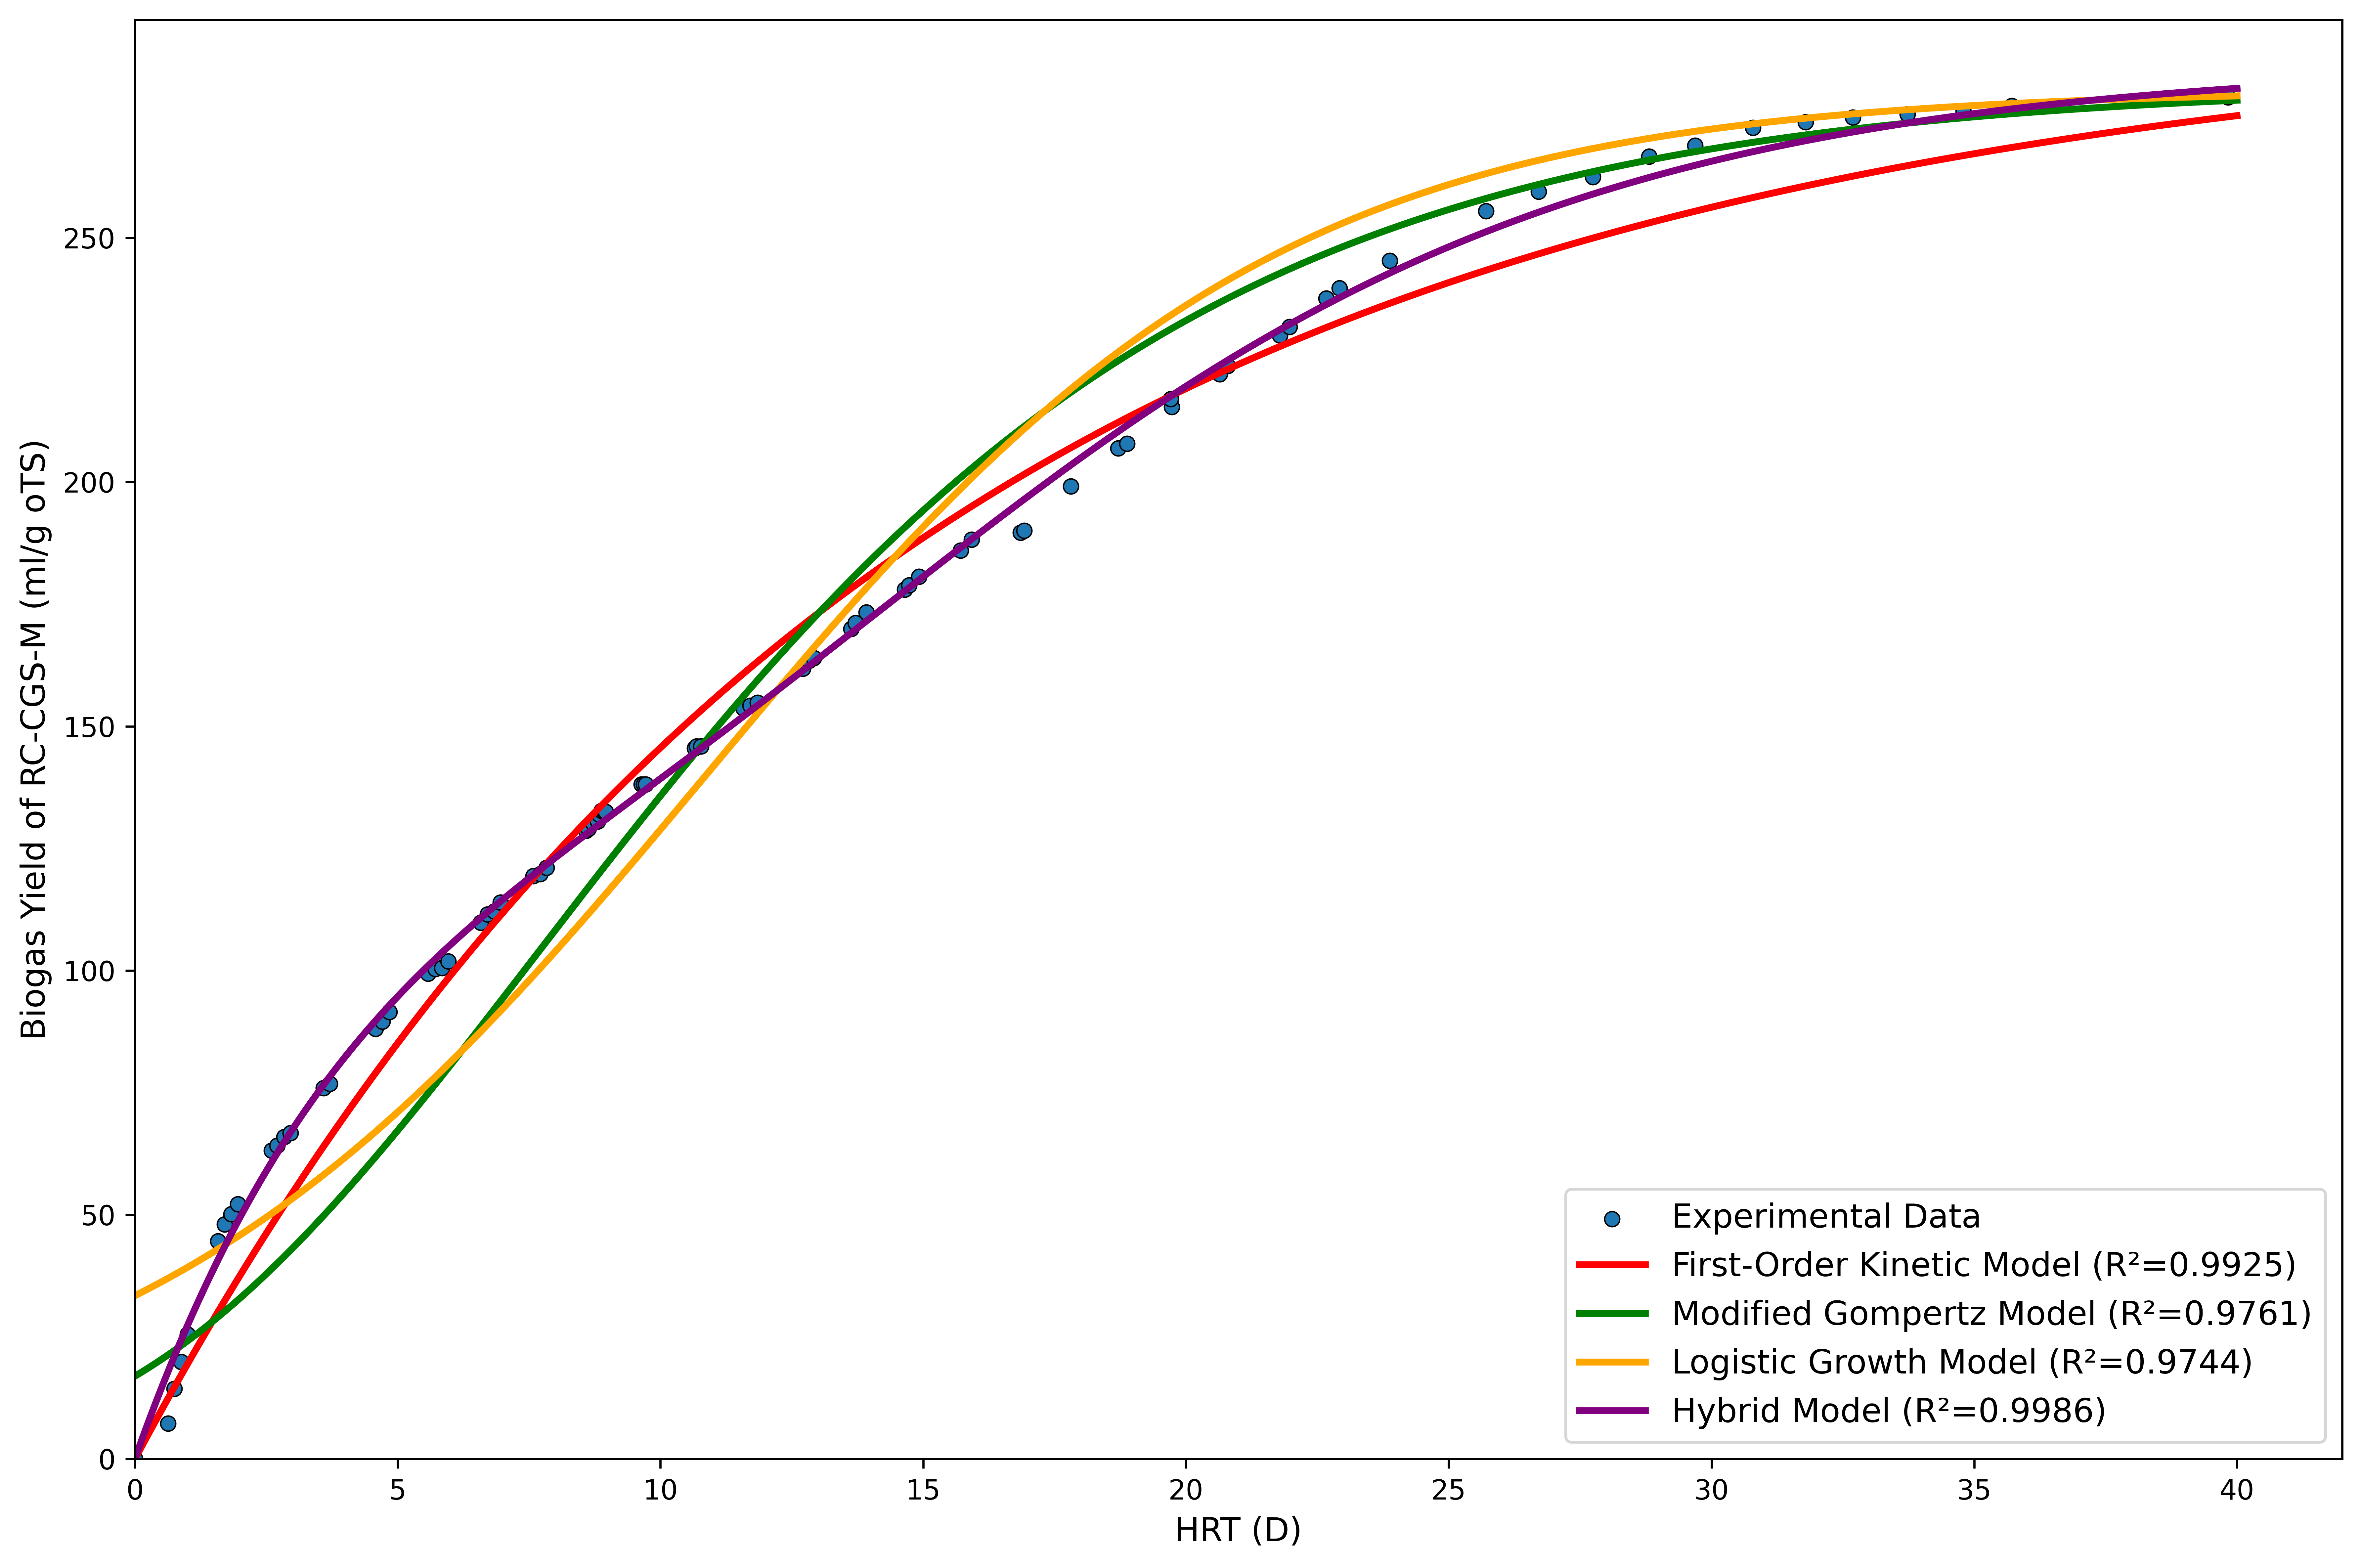


--- Summary of Kinetic Model Analysis (Full Data Fit) ---

Model Performance and Equations (Full Data Fit):


,Model,R-squared,RMSE,Equation
0,Hybrid Model,0.9986,3.2274,B(t) = 0.5 * (286.0018 * (1 - np.exp(-0.2116 *...
1,First-Order Kinetic Model,0.9925,7.4131,B(t) = 294.1375 * (1 - np.exp(-0.0683 * t))
2,Gompertz Model,0.9761,13.2077,B(t) = 281.7665 * exp(-exp((13.9726 * e / 281....
3,Logistic Growth Model,0.9744,13.6689,B(t) = 280.3850 / (1 + np.exp((4 * 12.8832 / 2...



Model Parameters and 95% Confidence Intervals (Full Data Fit):


,Model,Formatted Parameters,Formatted Confidence Intervals
0,Hybrid Model,"286.0018, 0.2116, 14.4554, 8.9718","(284.6743, 287.3292), (0.2044, 0.2189), (13.84..."
1,First-Order Kinetic Model,"294.1375, 0.0683","(290.8115, 297.4635), (0.0663, 0.0704)"
2,Gompertz Model,"281.7665, 13.9726, 0.2500","(276.9837, 286.5492), (13.0781, 14.8671), (-0...."
3,Logistic Growth Model,"280.3850, 12.8832, 0.0000","(275.6765, 285.0936), (12.0012, 13.7651), (-0...."



Insights:
- For the full dataset, the Hybrid Model provides the best fit with R-squared of 0.9986 and RMSE of 3.2274.
- The provided equations and parameters represent the best fit for each model across the full experimental period.
- Confidence intervals indicate the range within which the true parameters are likely to fall.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t
from google.colab import files
import os

# Define the list of file paths to process
file_paths = [
    '/content/drive/MyDrive/SummaryofBY/RC-CGS-M.csv',
    # Add other relevant file paths here if necessary
]

# Confidence interval calculation function
def get_confidence_intervals(popt, pcov, n, p):
    alpha = 0.05  # 95% confidence
    dof = max(0, n - p)
    # Avoid calculating confidence intervals if pcov contains inf or nan
    if pcov is None or not np.all(np.isfinite(pcov)):
        return [(np.nan, np.nan)] * len(popt)
    try:
        t_val = np.abs(t.ppf(alpha / 2, dof))
        perr = np.sqrt(np.diag(pcov))
        ci = []
        for i in range(len(popt)):
             # Handle potential errors in interval calculation
            try:
                lower_bound = popt[i] - t_val * perr[i]
                upper_bound = popt[i] + t_val * perr[i]
                ci.append((lower_bound, upper_bound))
            except Exception:
                ci.append((np.nan, np.nan))
        return ci
    except Exception:
        return [(np.nan, np.nan)] * len(popt)

# Define all model functions
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

def first_order_model(t, B0, k):
    # Avoid overflow in exponential
    exp_term = -k * t
    exp_term = np.clip(exp_term, -700, 700) # Clipping to avoid overflow
    return B0 * (1 - np.exp(exp_term))

def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = first_order_model(t, B0, k) # Use the clipped first-order model
    gompertz = gompertz_model(t, B0, Rm, lambda_)
    return (first_order + gompertz) / 2

def logistic_growth_model(t, B0, Rm, lambda_):
    # Avoid overflow in exponential
    exp_term = (4 * Rm / B0) * (lambda_ - t) + 2
    exp_term = np.clip(exp_term, -700, 700) # Clipping to avoid overflow
    return B0 / (1 + np.exp(exp_term))

# Define the time range for plotting and analysis
plotting_time_range = 40 # Keep this for plotting as per previous discussion

# Iterate through each file path
for file_path in file_paths:
    try:
        # Load the data
        data = pd.read_csv(file_path)
        cleaned_data = data.dropna()

        # Extract data for modeling (using full data for fitting as per user feedback)
        t_data_full = cleaned_data['HRT(D)'].values
        B_data_full = cleaned_data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values

        print(f"\nAnalyzing file: {file_path}")
        print("Data head:")
        display(data.head())
        print("Data columns:", data.columns.tolist())

        # Filter data for the specified plotting time range
        t_data_filtered = t_data_full[t_data_full <= plotting_time_range]
        B_data_filtered = B_data_full[t_data_full <= plotting_time_range]

        # Number of data points for confidence interval calculation (using full data for dof)
        n_full = len(B_data_full)
        n_filtered = len(B_data_filtered)


        # --- Model Fitting and Analysis (using FULL data for fitting) ---

        results = {}

        # Gompertz model
        model_name = "Gompertz Model"
        try:
            popt_g, pcov_g = curve_fit(gompertz_model, t_data_full, B_data_full, bounds=(0.25, [600, 70, 70]), maxfev=10000)
            p_g = len(popt_g)
            ci_g = get_confidence_intervals(popt_g, pcov_g, n_full, p_g)
            r_squared_g = r2_score(B_data_full, gompertz_model(t_data_full, *popt_g))
            rmse_g = np.sqrt(mean_squared_error(B_data_full, gompertz_model(t_data_full, *popt_g)))
            B0_g, Rm_g, lambda_g = popt_g
            equation_g = f'B(t) = {B0_g:.4f} * exp(-exp(({Rm_g:.4f} * e / {B0_g:.4f}) * ({lambda_g:.4f} - t) + 1))'
            results[model_name] = {"popt": popt_g, "pcov": pcov_g, "ci": ci_g, "r_squared": r_squared_g, "rmse": rmse_g, "equation": equation_g}
        except Exception as e:
            print(f"\n{model_name} Fitting Error: {e}")
            results[model_name] = {"popt": [np.nan]*3, "pcov": None, "ci": [(np.nan, np.nan)]*3, "r_squared": np.nan, "rmse": np.nan, "equation": "Fitting Failed"}


        # First-Order Kinetic model
        model_name = "First-Order Kinetic Model"
        try:
            popt_fo, pcov_fo = curve_fit(first_order_model, t_data_full, B_data_full, maxfev=10000)
            p_fo = len(popt_fo)
            ci_fo = get_confidence_intervals(popt_fo, pcov_fo, n_full, p_fo)
            r_squared_fo = r2_score(B_data_full, first_order_model(t_data_full, *popt_fo))
            rmse_fo = np.sqrt(mean_squared_error(B_data_full, first_order_model(t_data_full, *popt_fo)))
            B0_fo, k_fo = popt_fo
            equation_fo = f'B(t) = {B0_fo:.4f} * (1 - np.exp(-{k_fo:.4f} * t))'
            results[model_name] = {"popt": popt_fo, "pcov": pcov_fo, "ci": ci_fo, "r_squared": r_squared_fo, "rmse": rmse_fo, "equation": equation_fo}
        except Exception as e:
            print(f"\n{model_name} Fitting Error: {e}")
            results[model_name] = {"popt": [np.nan]*2, "pcov": None, "ci": [(np.nan, np.nan)]*2, "r_squared": np.nan, "rmse": np.nan, "equation": "Fitting Failed"}


        # Hybrid model
        model_name = "Hybrid Model"
        try:
            initial_guess_hybrid = [300, 0.1, 10, 1]
            bounds_hybrid = ([0, 0, 0, 0], [450, 100, 40, 40])
            popt_h, pcov_h = curve_fit(hybrid_model, t_data_full, B_data_full, p0=initial_guess_hybrid, bounds=bounds_hybrid, maxfev=10000)
            p_h = len(popt_h)
            ci_h = get_confidence_intervals(popt_h, pcov_h, n_full, p_h)
            r_squared_h = r2_score(B_data_full, hybrid_model(t_data_full, *popt_h))
            rmse_h = np.sqrt(mean_squared_error(B_data_full, hybrid_model(t_data_full, *popt_h)))
            B0_h, k_h, Rm_h, lambda_h = popt_h
            equation_h = f'B(t) = 0.5 * ({B0_h:.4f} * (1 - np.exp(-{k_h:.4f} * t)) + {B0_h:.4f} * np.exp(-np.exp(({Rm_h:.4f} * np.e / {B0_h:.4f}) * ({lambda_h:.4f} - t) + 1)))'
            results[model_name] = {"popt": popt_h, "pcov": pcov_h, "ci": ci_h, "r_squared": r_squared_h, "rmse": rmse_h, "equation": equation_h}
        except Exception as e:
            print(f"\n{model_name} Fitting Error: {e}")
            results[model_name] = {"popt": [np.nan]*4, "pcov": None, "ci": [(np.nan, np.nan)]*4, "r_squared": np.nan, "rmse": np.nan, "equation": "Fitting Failed"}

        # Logistic Growth model
        model_name = "Logistic Growth Model"
        try:
            popt_l, pcov_l = curve_fit(logistic_growth_model, t_data_full, B_data_full, bounds=(0, [300, 70, 7]), maxfev=10000)
            p_l = len(popt_l)
            ci_l = get_confidence_intervals(popt_l, pcov_l, n_full, p_l)
            r_squared_l = r2_score(B_data_full, logistic_growth_model(t_data_full, *popt_l))
            rmse_l = np.sqrt(mean_squared_error(B_data_full, logistic_growth_model(t_data_full, *popt_l)))
            B0_l, Rm_l, lambda_l = popt_l
            equation_l = f'B(t) = {B0_l:.4f} / (1 + np.exp((4 * {Rm_l:.4f} / {B0_l:.4f}) * ({lambda_l:.4f} - t) + 2))'
            results[model_name] = {"popt": popt_l, "pcov": pcov_l, "ci": ci_l, "r_squared": r_squared_l, "rmse": rmse_l, "equation": equation_l}
        except Exception as e:
            print(f"\n{model_name} Fitting Error: {e}")
            results[model_name] = {"popt": [np.nan]*3, "pcov": None, "ci": [(np.nan, np.nan)]*3, "r_squared": np.nan, "rmse": np.nan, "equation": "Fitting Failed"}

        # --- Plotting (using filtered data for range, full data parameters for curves) ---

        # Generate predictions for plotting over the filtered time range
        t_pred_plot = np.linspace(0, plotting_time_range, 300)

        B_pred_gompertz_plot = gompertz_model(t_pred_plot, *results["Gompertz Model"]["popt"]) if not np.any(np.isnan(results["Gompertz Model"]["popt"])) else np.full_like(t_pred_plot, np.nan)
        B_pred_first_order_plot = first_order_model(t_pred_plot, *results["First-Order Kinetic Model"]["popt"]) if not np.any(np.isnan(results["First-Order Kinetic Model"]["popt"])) else np.full_like(t_pred_plot, np.nan)
        B_pred_hybrid_plot = hybrid_model(t_pred_plot, *results["Hybrid Model"]["popt"]) if not np.any(np.isnan(results["Hybrid Model"]["popt"])) else np.full_like(t_pred_plot, np.nan)
        B_pred_logistic_plot = logistic_growth_model(t_pred_plot, *results["Logistic Growth Model"]["popt"]) if not np.any(np.isnan(results["Logistic Growth Model"]["popt"])) else np.full_like(t_pred_plot, np.nan)

        # Create the plot
        plt.figure(figsize=(12, 8), dpi=600)

        # Plot experimental data filtered for the plotting range
        plt.scatter(t_data_filtered, B_data_filtered, label='Experimental Data', s=30, edgecolors='black', linewidths=0.5)

        # Plot fitted curves if fit was successful (using full data parameters)
        if not np.any(np.isnan(B_pred_first_order_plot)):
            plt.plot(t_pred_plot, B_pred_first_order_plot, label=f'First-Order Kinetic Model (R²={results["First-Order Kinetic Model"]["r_squared"]:.4f})', color='red', linewidth=2.5)
        if not np.any(np.isnan(B_pred_gompertz_plot)):
            plt.plot(t_pred_plot, B_pred_gompertz_plot, label=f'Modified Gompertz Model (R²={results["Gompertz Model"]["r_squared"]:.4f})', color='green', linewidth=2.5) # Corrected f-string syntax
        if not np.any(np.isnan(B_pred_logistic_plot)):
            plt.plot(t_pred_plot, B_pred_logistic_plot, label=f'Logistic Growth Model (R²={results["Logistic Growth Model"]["r_squared"]:.4f})', color='orange', linewidth=2.5)
        if not np.any(np.isnan(B_pred_hybrid_plot)):
            plt.plot(t_pred_plot, B_pred_hybrid_plot, label=f'Hybrid Model (R²={results["Hybrid Model"]["r_squared"]:.4f})', color='purple', linewidth=2.5)


        # Add labels and legend
        plt.xlabel('HRT (D)', fontsize=12, fontname='Times New Roman')
        plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)', fontsize=12, fontname='Times New Roman')
        plt.legend(loc='lower right', fontsize=12)

        # Set axis limits to include the origin
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        # Ensure no grid and no title
        plt.grid(False)
        plt.title('')

        plt.tight_layout()

        # Save the figure as a high-resolution TIFF
        filename = os.path.splitext(os.path.basename(file_path))[0] + f'_kinetic_modeling_plot_upto{plotting_time_range}days.tiff'
        plt.savefig(filename, dpi=600, bbox_inches='tight', format='tiff')

        # Automatically download the file
        try:
            files.download(filename)
            print(f"Downloaded {filename}")
        except Exception as e:
            print(f"Could not automatically download {filename}. It is saved in the Colab environment.")

        # Display the plot
        plt.show()


        # --- Summary Table ---
        print("\n--- Summary of Kinetic Model Analysis (Full Data Fit) ---")

        summary_data = []
        for model_name, metrics in results.items():
            summary_data.append({
                "Model": model_name,
                "R-squared": f"{metrics['r_squared']:.4f}" if pd.notna(metrics['r_squared']) else "NaN",
                "RMSE": f"{metrics['rmse']:.4f}" if pd.notna(metrics['rmse']) else "NaN",
                "Equation": metrics["equation"],
                "Parameters": metrics["popt"],
                "Confidence Intervals": metrics["ci"]
            })

        summary_df = pd.DataFrame(summary_data)

        # Rank models based on R-squared (descending) and RMSE (ascending)
        # Need to convert R-squared and RMSE back to numeric for sorting if they were formatted as strings
        summary_df_sorted = summary_df.copy()
        summary_df_sorted['R-squared_numeric'] = pd.to_numeric(summary_df_sorted['R-squared'], errors='coerce')
        summary_df_sorted['RMSE_numeric'] = pd.to_numeric(summary_df_sorted['RMSE'], errors='coerce')

        summary_df_ranked = summary_df_sorted.sort_values(by=['R-squared_numeric', 'RMSE_numeric'], ascending=[False, True]).reset_index(drop=True)

        print("\nModel Performance and Equations (Full Data Fit):")
        # Use pandas formatting for display
        with pd.option_context('display.precision', 4):
             display(summary_df_ranked[['Model', 'R-squared', 'RMSE', 'Equation']])

        print("\nModel Parameters and 95% Confidence Intervals (Full Data Fit):")
        # Format confidence intervals for better display
        def format_ci(ci_list):
            if not ci_list:
                return "N/A"
            formatted_ci = []
            for ci in ci_list:
                if np.isnan(ci[0]) or np.isnan(ci[1]):
                    formatted_ci.append("(NaN, NaN)")
                else:
                    formatted_ci.append(f"({ci[0]:.4f}, {ci[1]:.4f})") # Format to 4 decimal places
            return ", ".join(formatted_ci)

        summary_df_ranked['Formatted Confidence Intervals'] = summary_df_ranked['Confidence Intervals'].apply(format_ci)

        # Format parameters to 4 decimal places for display
        def format_params(param_list):
             if not isinstance(param_list, np.ndarray):
                 return param_list
             return ", ".join([f"{p:.4f}" if pd.notna(p) else "NaN" for p in param_list])

        summary_df_ranked['Formatted Parameters'] = summary_df_ranked['Parameters'].apply(format_params)

        display(summary_df_ranked[['Model', 'Formatted Parameters', 'Formatted Confidence Intervals']])

        print("\nInsights:")
        if not summary_df_ranked.empty and pd.notna(summary_df_ranked.iloc[0]['R-squared_numeric']):
             print(f"- For the full dataset, the {summary_df_ranked.iloc[0]['Model']} provides the best fit with R-squared of {summary_df_ranked.iloc[0]['R-squared']} and RMSE of {summary_df_ranked.iloc[0]['RMSE']}.")
        else:
            print("- Model fitting did not succeed for any model on the full dataset.")
        print("- The provided equations and parameters represent the best fit for each model across the full experimental period.")
        print("- Confidence intervals indicate the range within which the true parameters are likely to fall.")


    except Exception as e:
        print(f"Error processing file {file_path}: {e}")